In [ ]:
from random import randint as rand
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
import math

data = np.genfromtxt('C:\\Users\\Zatara\\anaconda\\seeds_dataset.txt', delimiter='', usecols=(0,1,2,3,4,5,6))

def get_column(A, j):
    return [A_i[j] # jth element of row A_i
            for A_i in A] # for each row A_i

def media(x):
    return sum(x) / len(x)

def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.iteritems()
                if count == max_count]

def mediana(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = media(x)
    return [x_i - x_bar for x_i in x]


def sum_of_squares(x):
    return sum([x_i * x_i for x_i in x])

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n -1)

def standard_deviation(x):
    return math.sqrt(variance(x))

def dot(v, w):
    return sum(vi * wi for vi, wi in zip(v, w))

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

Exercicio 01

In [2]:

print "Moda comprimento Kama: ", mode(data[0:70,3])
print "Mediana comprimento Kama: ",mediana(data[0:70,3])
print "Moda largura Kama: ", mode(data[0:70,4])
print "Mediana largura Kama: ",mediana(data[0:70,4])
print "####################################################"
print "Moda comprimento Rosa: ", mode(data[70:140,3])
print "Mediana comprimento Rosa: ",mediana(data[70:140,3])
print "Moda largura Rosa: ", mode(data[70:140,4])
print "Mediana largura Rosa: ",mediana(data[70:140,4])
print "####################################################"
print "Moda comprimento Canadian: ", mode(data[140:210,3])
print "Mediana comprimento Canadian: ",mediana(data[140:210,3])
print "Moda largura Canadian: ", mode(data[140:210,4])
print "Mediana largura Canadian: ",mediana(data[140:210,4])
 

Moda comprimento Kama:  [5.395]
Mediana comprimento Kama:  5.534000000000001
Moda largura Kama:  [3.158, 3.201, 3.333, 3.113, 3.156, 3.199, 3.377, 3.312, 3.026]
Mediana largura Kama:  3.2435
####################################################
Moda comprimento Rosa:  [6.285, 6.037, 5.979]
Mediana comprimento Rosa:  6.1485
Moda largura Rosa:  [3.755, 3.857, 3.594, 3.769]
Mediana largura Rosa:  3.6935000000000002
####################################################
Moda comprimento Canadian:  [5.236]
Mediana comprimento Canadian:  5.224
Moda largura Canadian:  [2.675, 2.81, 2.821, 2.911, 2.763, 2.967]
Mediana largura Canadian:  2.8345000000000002


Exercicio 02

Quanto maior o desvio padrao , mais heterogenea sera a amostra. Da mesma forma quanto menor for o desvio padrao , mais homogenea sera a amostra.

In [3]:
print "Desvio padrao comprimento Kama: ", standard_deviation(data[0:70,3])

print "Desvio padrao comprimento Rosa: ", standard_deviation(data[70:140,3])

print "Desvio padrao comprimento Canadian: ", standard_deviation(data[140:210,3])

Desvio padrao comprimento Kama:  0.231508029454
Desvio padrao comprimento Rosa:  0.268191148112
Desvio padrao comprimento Canadian:  0.138015200051


Exercicio 03

Quanto maior o desvio padrao , mais heterogenea sera a amostra. Da mesma forma quanto menor for o desvio padrao , mais homogenea sera a amostra.

In [4]:
print "Desvio padrao largura Kama: ", standard_deviation(data[0:70,4])

print "Desvio padrao largura Rosa: ", standard_deviation(data[70:140,4])

print "Desvio padrao largura Canadian: ", standard_deviation(data[140:210,4])

Desvio padrao largura Kama:  0.177615540793
Desvio padrao largura Rosa:  0.185539127703
Desvio padrao largura Canadian:  0.147516068536


Exercicio 04
A correlacao varia de -1 a 1. Quanto mais se aproximar de zero , menor é a correlacao. Valore proximos de -1 indicam uma correlacao inversamente proporcional(quanto maior um valor o outro sera menor). Valore proximos de 1 indicam uma correlacao diretamente proporcional(quanto maior um valor o outro sera maior).

In [5]:
print "Correlacao comprimento e largura Kama: ", correlation(data[0:70,3],data[0:70,4])

print "Correlacao comprimento e largura Rosa: ", correlation(data[70:140,3],data[70:140,4])

print "Correlacao comprimento e largura Canadian: ", correlation(data[140:210,3],data[140:210,4])

Correlacao comprimento e largura Kama:  0.5505605273038401
Correlacao comprimento e largura Rosa:  0.5130853843822178
Correlacao comprimento e largura Canadian:  0.08206079539342506


Exercicio 05

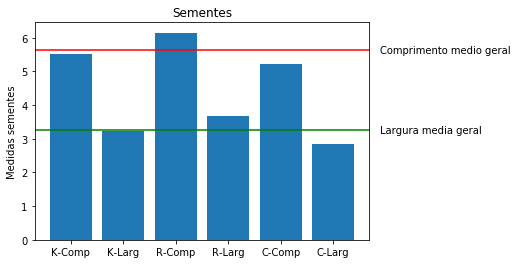

In [6]:
CompLargs = ["K-Comp","K-Larg","R-Comp","R-Larg","C-Comp","C-Larg"]

kama=[np.mean(get_column(data[0:70], i)) for i in range(3,5)]
rosa=[np.mean(get_column(data[70:140], i)) for i in range(3,5)]
canadian=[np.mean(get_column(data[140:210], i)) for i in range(3,5)]

medidas=kama+rosa+canadian

mediaComp = media(data[0:210,3])
mediaLarg = media(data[0:210,4])

xs = [i + 0.1 for i, _ in enumerate(CompLargs)]

plt.bar(xs, medidas)
plt.ylabel("Medidas sementes")
plt.title("Sementes") 
plt.xticks([i + 0.1 for i, _ in enumerate(CompLargs)], CompLargs)
plt.axhline(mediaComp, color="red") #Gera a linha
plt.text(6, mediaComp, 'Comprimento medio geral', va='center', ha="left") #texto
plt.axhline(mediaLarg, color="green") #Gera a linha
plt.text(6, mediaLarg, 'Largura media geral', va='center', ha="left") #texto
plt.show()

Exercicio 06

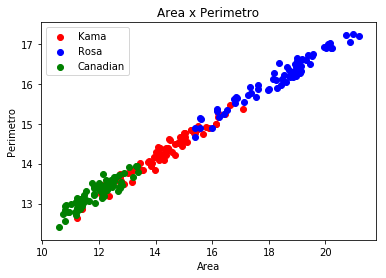

In [7]:
plt.scatter(data[0:70,0],data[0:70,1], c='red',label='Kama')
plt.scatter(data[70:140,0],data[70:140,1], c='blue', label='Rosa')
plt.scatter(data[140:210,0],data[140:210,1], c='green', label='Canadian')
plt.title("Area x Perimetro")
plt.xlabel("Area")
plt.ylabel("Perimetro")
plt.legend(loc=0)
plt.show()